<a href="https://colab.research.google.com/github/wrkurdrm/SamsungXPostech/blob/main/%EC%82%BC%ED%99%94_eda_0909.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시작

In [1]:
#넘파이, 판다스 및 필요 라이브러리 호출
import numpy as np
import pandas as pd

#시각화 라이브러리 호출
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#한글 깨짐 현상을 방지하기 위한 글꼴 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
plt.rc('font', family='NanumBarunGothic')

In [85]:
from google.colab import files
myfile = files.upload()


Saving (자동차보험) 강설량에 따른 사고율 예측 모델_1.xlsx to (자동차보험) 강설량에 따른 사고율 예측 모델_1.xlsx
Saving (자동차보험) 강설량에 따른 사고율 예측 모델_2.xlsx to (자동차보험) 강설량에 따른 사고율 예측 모델_2.xlsx
Saving (자동차보험) 강설량에 따른 사고율 예측 모델_3.xlsx to (자동차보험) 강설량에 따른 사고율 예측 모델_3.xlsx


In [86]:
dat1=pd.read_excel('/content/(자동차보험) 강설량에 따른 사고율 예측 모델_1.xlsx')
dat1.head()

,사고발생일자,사고발생년도,사고발생월도,지역(시도),지역(구군),공휴일구분,주말구분,요일,주차,사고건수
0,20170101,2017,1,전남,무안군,Y,Y,7,1,22
1,20170101,2017,1,전남,장성군,Y,Y,7,1,3
2,20170101,2017,1,인천,중구,Y,Y,7,1,19
3,20170101,2017,1,경북,경주시,Y,Y,7,1,35
4,20170101,2017,1,경남,통영시,Y,Y,7,1,14


In [87]:
dat2=pd.read_excel('/content/(자동차보험) 강설량에 따른 사고율 예측 모델_2.xlsx')
dat2.head()

,사고발생일자,사고발생년도,사고발생월도,지역(시도),지역(구군),공휴일구분,주말구분,요일,주차,사고건수
0,20190701,2019,7,부산,기장군,N,N,1,1,12
1,20190701,2019,7,강원,삼척시,N,N,1,1,5
2,20190701,2019,7,대구,남구,N,N,1,1,19
3,20190701,2019,7,강원,홍천군,N,N,1,1,1
4,20190701,2019,7,인천,강화군,N,N,1,1,12


In [88]:
dat3=pd.read_excel('/content/(자동차보험) 강설량에 따른 사고율 예측 모델_3.xlsx')
dat3.head()

,사고발생일자,사고발생년도,사고발생월도,지역(시도),지역(구군),공휴일구분,주말구분,요일,주차,사고건수
0,20220101,2022,1,광주,광산구,Y,Y,6,1,17
1,20220101,2022,1,경북,성주군,Y,Y,6,1,1
2,20220101,2022,1,인천,서구,Y,Y,6,1,41
3,20220101,2022,1,부산,해운대구,Y,Y,6,1,21
4,20220101,2022,1,충남,논산시,Y,Y,6,1,15


In [89]:
dat=pd.concat([dat1,dat2,dat3])
dat.head()

,사고발생일자,사고발생년도,사고발생월도,지역(시도),지역(구군),공휴일구분,주말구분,요일,주차,사고건수
0,20170101,2017,1,전남,무안군,Y,Y,7,1,22
1,20170101,2017,1,전남,장성군,Y,Y,7,1,3
2,20170101,2017,1,인천,중구,Y,Y,7,1,19
3,20170101,2017,1,경북,경주시,Y,Y,7,1,35
4,20170101,2017,1,경남,통영시,Y,Y,7,1,14


In [90]:
dat.tail()

,사고발생일자,사고발생년도,사고발생월도,지역(시도),지역(구군),공휴일구분,주말구분,요일,주차,사고건수
121005,20230630,2023,6,인천,동구,N,N,5,5,6
121006,20230630,2023,6,부산,남구,N,N,5,5,8
121007,20230630,2023,6,대구,동구,N,N,5,5,13
121008,20230630,2023,6,전남,담양군,N,N,5,5,5
121009,20230630,2023,6,충남,서천군,N,N,5,5,3


In [40]:
df1=pd.read_excel('/content/(자동차보험) 강설량에 따른 사고율 예측 모델_1_1.xlsx')
df1.head()

,사고발생일자,지역(시도),사고건수
0,20170101,강원,349
1,20170101,경기,1031
2,20170101,경남,257
3,20170101,경북,289
4,20170101,광주,95


In [41]:
df1.tail()

,사고발생일자,지역(시도),사고건수
386,20170123,전남,236
387,20170123,전북,222
388,20170123,제주,52
389,20170123,충남,368
390,20170123,충북,214


In [42]:
#df2=pd.read_excel('/content/(자동차보험) 강설량에 따른 사고율 예측 모델_2_2.xlsx')
#df2.head()

In [43]:
#df3=pd.read_excel('/content/(자동차보험) 강설량에 따른 사고율 예측 모델_3_3.xlsx')
#df3.head()

In [44]:
#df_sum=pd.concat([df1,df2,df3]) #summary(요약된) df
#df_sum.head()

In [45]:
#df_sum.tail()

# 원본 데이터 사고건수 살펴보기 (5 - num summary)

In [46]:
'''Q1, Q2, Q3,Q4 = np.percentile(dat["사고건수"], [25, 50, 75,100])
print(Q1)
print(Q2)
print(Q3)
print(Q4)'''

'Q1, Q2, Q3,Q4 = np.percentile(dat["사고건수"], [25, 50, 75,100])\nprint(Q1)\nprint(Q2)\nprint(Q3)\nprint(Q4)'

In [47]:
#dat['사고건수'].mean()

# 블랙아이스

In [48]:
suburb=pd.read_excel('/content/강원충북충남경북경남전북전남제주 일교차습도평균지면온도_설명생략.xlsx')
suburb.head()

,사고발생일자,지역(시도),평균최저기온(℃),일교차,평균습도(%rh),평균지면온도
0,2017-01-01,강원,-1.066667,7.566667,69.666667,0.342857
1,2017-01-02,강원,1.433333,7.500000,70.333333,1.785714
2,2017-01-03,강원,-1.800000,10.400000,59.333333,0.957143
3,2017-01-04,강원,-1.066667,10.433333,61.666667,1.292857
4,2017-01-05,강원,-1.933333,8.033333,75.666667,0.614286


In [49]:
urban=pd.read_excel('/content/서울부산대구인천광주대전울산경기세종 일교차습도평균지면온도.xlsx')
urban.head()

,사고발생일자,지역(시도),최저기온(℃),일교차,평균습도(%rh),평균지면온도
0,2017-01-01,서울,-1.6,",8.5",75.9,0.9
1,2017-01-02,서울,1.8,",7.4",77.8,4.8
2,2017-01-03,서울,-2.3,",10",61.8,1.5
3,2017-01-04,서울,1.0,",7.9",55.0,3.0
4,2017-01-05,서울,-0.1,",7.4",52.3,2.4


In [50]:
urban.rename(columns={'최저기온(℃)':'평균최저기온(℃)'},inplace=True) #칼럼명 통일하여 오류 방지
urban.head()

,사고발생일자,지역(시도),평균최저기온(℃),일교차,평균습도(%rh),평균지면온도
0,2017-01-01,서울,-1.6,",8.5",75.9,0.9
1,2017-01-02,서울,1.8,",7.4",77.8,4.8
2,2017-01-03,서울,-2.3,",10",61.8,1.5
3,2017-01-04,서울,1.0,",7.9",55.0,3.0
4,2017-01-05,서울,-0.1,",7.4",52.3,2.4


In [51]:
blackice=pd.concat([suburb,urban])
blackice

,사고발생일자,지역(시도),평균최저기온(℃),일교차,평균습도(%rh),평균지면온도
0,2017-01-01,강원,-1.066667,7.566667,69.666667,0.342857
1,2017-01-02,강원,1.433333,7.5,70.333333,1.785714
2,2017-01-03,강원,-1.800000,10.4,59.333333,0.957143
3,2017-01-04,강원,-1.066667,10.433333,61.666667,1.292857
4,2017-01-05,강원,-1.933333,8.033333,75.666667,0.614286
...,...,...,...,...,...,...
21039,2023-08-29,세종,21.400000,",6.3",89.100000,NaN
21040,2023-08-30,세종,20.200000,",2.9",95.100000,NaN
21041,2023-08-31,세종,19.800000,",8.2",84.400000,NaN
21042,2023-09-01,세종,18.300000,",11.2",81.400000,NaN


In [52]:
len(blackice)

40532

In [53]:
'''for i in len(blackice)
  if blackice[i,]

int("123,000,000".replace(",",""))'''

'for i in len(blackice)\n  if blackice[i,]\n\nint("123,000,000".replace(",",""))'

In [54]:
#blackice['일교차'] = blackice['일교차'].apply(lambda x: pd.to_numeric(str(x)))
#blackice

In [55]:
#dat.info()

In [56]:
blackice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40532 entries, 0 to 21043
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   사고발생일자     40532 non-null  datetime64[ns]
 1   지역(시도)     40532 non-null  object        
 2   평균최저기온(℃)  40528 non-null  float64       
 3   일교차        40532 non-null  object        
 4   평균습도(%rh)  40524 non-null  float64       
 5   평균지면온도     38681 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 2.2+ MB


**사고발생일자 데이터 형식을 맞춰 오류를 방지한다.**

In [57]:
#dat['사고발생일자'] = dat['사고발생일자'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
#dat

In [58]:
df1['사고발생일자'] = df1['사고발생일자'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
df1

,사고발생일자,지역(시도),사고건수
0,2017-01-01,강원,349
1,2017-01-01,경기,1031
2,2017-01-01,경남,257
3,2017-01-01,경북,289
4,2017-01-01,광주,95
...,...,...,...
386,2017-01-23,전남,236
387,2017-01-23,전북,222
388,2017-01-23,제주,52
389,2017-01-23,충남,368


In [59]:
#df_sum.info()

In [60]:
#df_sum['사고발생일자'] = df_sum['사고발생일자'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
#df_sum

In [61]:
blackice

,사고발생일자,지역(시도),평균최저기온(℃),일교차,평균습도(%rh),평균지면온도
0,2017-01-01,강원,-1.066667,7.566667,69.666667,0.342857
1,2017-01-02,강원,1.433333,7.5,70.333333,1.785714
2,2017-01-03,강원,-1.800000,10.4,59.333333,0.957143
3,2017-01-04,강원,-1.066667,10.433333,61.666667,1.292857
4,2017-01-05,강원,-1.933333,8.033333,75.666667,0.614286
...,...,...,...,...,...,...
21039,2023-08-29,세종,21.400000,",6.3",89.100000,NaN
21040,2023-08-30,세종,20.200000,",2.9",95.100000,NaN
21041,2023-08-31,세종,19.800000,",8.2",84.400000,NaN
21042,2023-09-01,세종,18.300000,",11.2",81.400000,NaN


In [62]:
#merged_df=pd.merge(df_sum,blackice,how='inner')
#merged_df

In [63]:
merged_df=pd.merge(df1,blackice,how='inner')
merged_df

,사고발생일자,지역(시도),사고건수,평균최저기온(℃),일교차,평균습도(%rh),평균지면온도
0,2017-01-01,강원,349,-1.066667,7.566667,69.666667,0.342857
1,2017-01-01,경기,1031,-4.880000,11.4,82.620000,-0.260000
2,2017-01-01,경남,257,-1.900000,13.3,72.000000,2.385714
3,2017-01-01,경북,289,-1.900000,11.9,69.000000,1.657143
4,2017-01-01,광주,95,-0.600000,",11.8",80.600000,2.400000
...,...,...,...,...,...,...,...
363,2017-01-23,전남,236,-5.300000,5.8,70.000000,0.007692
364,2017-01-23,전북,222,-8.100000,6.8,71.000000,0.244444
365,2017-01-23,제주,52,0.400000,4.5,58.000000,3.400000
366,2017-01-23,충남,368,-11.500000,9.3,71.000000,0.300000


In [64]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 0 to 367
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   사고발생일자     368 non-null    datetime64[ns]
 1   지역(시도)     368 non-null    object        
 2   사고건수       368 non-null    int64         
 3   평균최저기온(℃)  368 non-null    float64       
 4   일교차        368 non-null    object        
 5   평균습도(%rh)  368 non-null    float64       
 6   평균지면온도     368 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 23.0+ KB


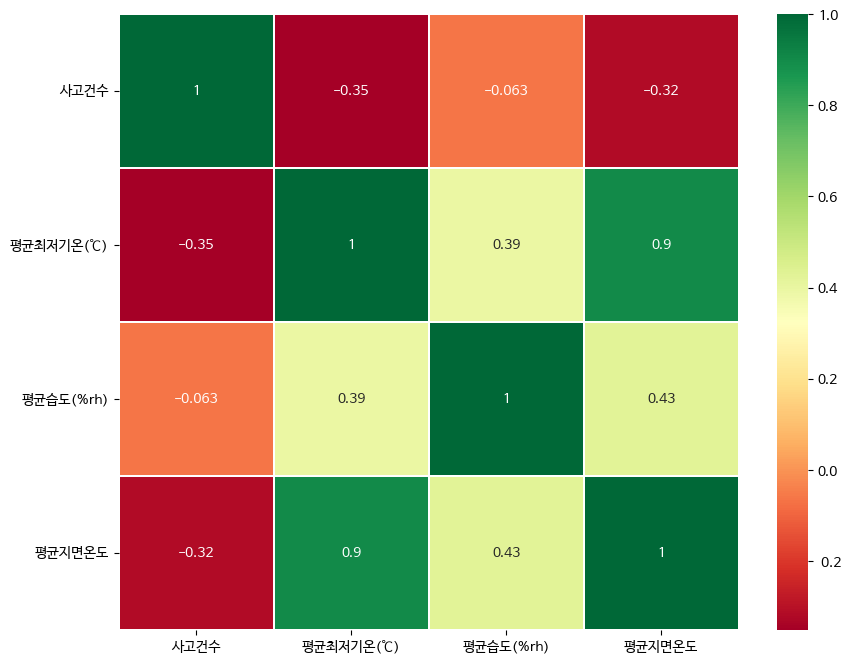

In [65]:
sns.heatmap(merged_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# 강설량

In [66]:
snow=pd.read_excel('/content/강설량통합데이터.xlsx')
snow.head()

,연도,날짜,지점,일 최심신적설(cm),사고발생일자
0,2017,105,경북,NaN,20170105
1,2017,109,경북,NaN,20170109
2,2017,110,수원,NaN,20170110
3,2017,110,경북,NaN,20170110
4,2017,110,인천,NaN,20170110


In [67]:
snow['사고발생일자'] = snow['사고발생일자'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
snow.rename(columns={'지점':'지역(시도)'},inplace=True) #칼럼명 통일하여 오류 방지
snow.head()

,연도,날짜,지역(시도),일 최심신적설(cm),사고발생일자
0,2017,105,경북,NaN,2017-01-05
1,2017,109,경북,NaN,2017-01-09
2,2017,110,수원,NaN,2017-01-10
3,2017,110,경북,NaN,2017-01-10
4,2017,110,인천,NaN,2017-01-10


In [68]:
snow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2725 entries, 0 to 2724
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   연도           2725 non-null   int64         
 1   날짜           2725 non-null   int64         
 2   지역(시도)       2725 non-null   object        
 3   일 최심신적설(cm)  1325 non-null   float64       
 4   사고발생일자       2725 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 106.6+ KB


# 도로

In [69]:
road=pd.read_excel('/content/도로종합_0909.xlsx')
road.head()

,지점,연장
0,강원,78.32
1,경기,21.00
2,경남,16.80
3,경북,53.06
4,광주,8.00


In [70]:
road.rename(columns={'지점':'지역(시도)'},inplace=True) #칼럼명 통일하여 오류 방지
road.head()

,지역(시도),연장
0,강원,78.32
1,경기,21.00
2,경남,16.80
3,경북,53.06
4,광주,8.00


In [71]:
'''road=road.drop(['연도','지역(구군)',],axis=1)'''

"road=road.drop(['연도','지역(구군)',],axis=1)"

In [72]:
road.tail()

,지역(시도),연장
9,인천,1.00
10,전남,40.73
11,전북,33.46
12,충남,23.65
13,충북,42.60


In [73]:
'''merged_df2=pd.merge(snow,road,how='inner')
merged_df2'''

"merged_df2=pd.merge(snow,road,how='inner')\nmerged_df2"

In [74]:
'''sns.heatmap(merged_df2.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()'''

"sns.heatmap(merged_df2.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)\nfig=plt.gcf()\nfig.set_size_inches(10,8)\nplt.show()"

In [75]:
merged_df.rename(columns={'사고발생년도':'연도'},inplace=True) #칼럼명 통일하여 오류 방지
#merged_df.rename(columns={'지역(시도)':'지점'},inplace=True)


In [76]:
merged_df

,사고발생일자,지역(시도),사고건수,평균최저기온(℃),일교차,평균습도(%rh),평균지면온도
0,2017-01-01,강원,349,-1.066667,7.566667,69.666667,0.342857
1,2017-01-01,경기,1031,-4.880000,11.4,82.620000,-0.260000
2,2017-01-01,경남,257,-1.900000,13.3,72.000000,2.385714
3,2017-01-01,경북,289,-1.900000,11.9,69.000000,1.657143
4,2017-01-01,광주,95,-0.600000,",11.8",80.600000,2.400000
...,...,...,...,...,...,...,...
363,2017-01-23,전남,236,-5.300000,5.8,70.000000,0.007692
364,2017-01-23,전북,222,-8.100000,6.8,71.000000,0.244444
365,2017-01-23,제주,52,0.400000,4.5,58.000000,3.400000
366,2017-01-23,충남,368,-11.500000,9.3,71.000000,0.300000


# 히트맵, 그래프 등 시각화

In [77]:
merged_df2=pd.merge(merged_df,road,how='inner')
merged_df2

,사고발생일자,지역(시도),사고건수,평균최저기온(℃),일교차,평균습도(%rh),평균지면온도,연장
0,2017-01-01,강원,349,-1.066667,7.566667,69.666667,0.342857,78.32
1,2017-01-02,강원,178,1.433333,7.5,70.333333,1.785714,78.32
2,2017-01-03,강원,166,-1.800000,10.4,59.333333,0.957143,78.32
3,2017-01-04,강원,177,-1.066667,10.433333,61.666667,1.292857,78.32
4,2017-01-05,강원,180,-1.933333,8.033333,75.666667,0.614286,78.32
...,...,...,...,...,...,...,...,...
317,2017-01-19,충북,171,-6.700000,13.1,67.000000,-1.560000,42.60
318,2017-01-20,충북,433,-7.300000,5.8,74.000000,-0.460000,42.60
319,2017-01-21,충북,141,-10.200000,11.1,74.000000,-1.120000,42.60
320,2017-01-22,충북,177,-9.300000,7.4,60.000000,-1.180000,42.60


<Axes: xlabel='지역(시도)', ylabel='사고건수'>

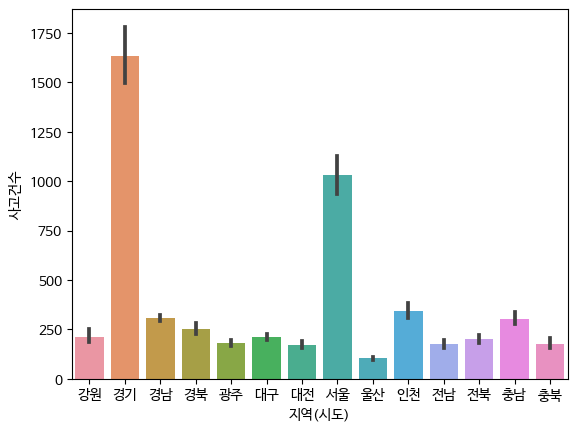

In [78]:
sns.barplot(x='지역(시도)',y='사고건수',data=merged_df2)

In [79]:
#sns.barplot(x='사고발생월도',y='사고건수',data=merged_df2)

결빙, 강설량이 많은 동절기인 11,12월에 사고 제일 많음.
해빙기인 2~3월에 급격한 감소

In [80]:
fin_df=pd.merge(snow,merged_df2,how='inner') #final dataframe

In [81]:
fin_df=fin_df.drop(['날짜'],axis=1)
fin_df

,연도,지역(시도),일 최심신적설(cm),사고발생일자,사고건수,평균최저기온(℃),일교차,평균습도(%rh),평균지면온도,연장
0,2017,경북,NaN,2017-01-05,209,-1.1,9.0,79.0,2.342857,53.06
1,2017,경북,NaN,2017-01-09,209,0.5,8.9,54.0,4.414286,53.06
2,2017,경북,NaN,2017-01-10,229,-2.3,7.3,44.0,0.642857,53.06
3,2017,인천,NaN,2017-01-10,263,-5.6,",6.2",49.6,-1.066667,1.00
4,2017,인천,NaN,2017-01-10,263,-5.6,",6.2",49.6,-1.066667,1.00
...,...,...,...,...,...,...,...,...,...,...
104,2017,대전,NaN,2017-01-23,197,-10.0,",8.6",65.0,-1.600000,2.00
105,2017,인천,0.0,2017-01-23,511,-11.1,",6.2",53.5,-1.600000,1.00
106,2017,전남,1.8,2017-01-23,236,-5.3,5.8,70.0,0.007692,40.73
107,2017,전북,NaN,2017-01-23,222,-8.1,6.8,71.0,0.244444,33.46


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(fin_df, *['일 최심신적설(cm)'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(fin_df, *['사고건수'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(fin_df, *['평균최저기온(℃)'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(fin_df, *['평균습도(%rh)'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(fin_df, *['일 최심신적설(cm)'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(fin_df, *['사고건수'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(fin_df, *['평균최저기온(℃)'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(fin_df, *['평균습도(%rh)'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(fin_df, *[[['일 최심신적설(cm)', '사고건수'], ['사고건수', '평균최저기온(℃)'], ['평균최저기온(℃)', '평균습도(%rh)'], ['평균습도(%rh)', '평균지면온도']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(fin_df, *['사고발생일자', '일 최심신적설(cm)', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(fin_df, *['사고발생일자', '사고건수', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(fin_df, *['사고발생일자', '평균최저기온(℃)', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(fin_df, *['사고발생일자', '평균습도(%rh)', None], **{})
chart

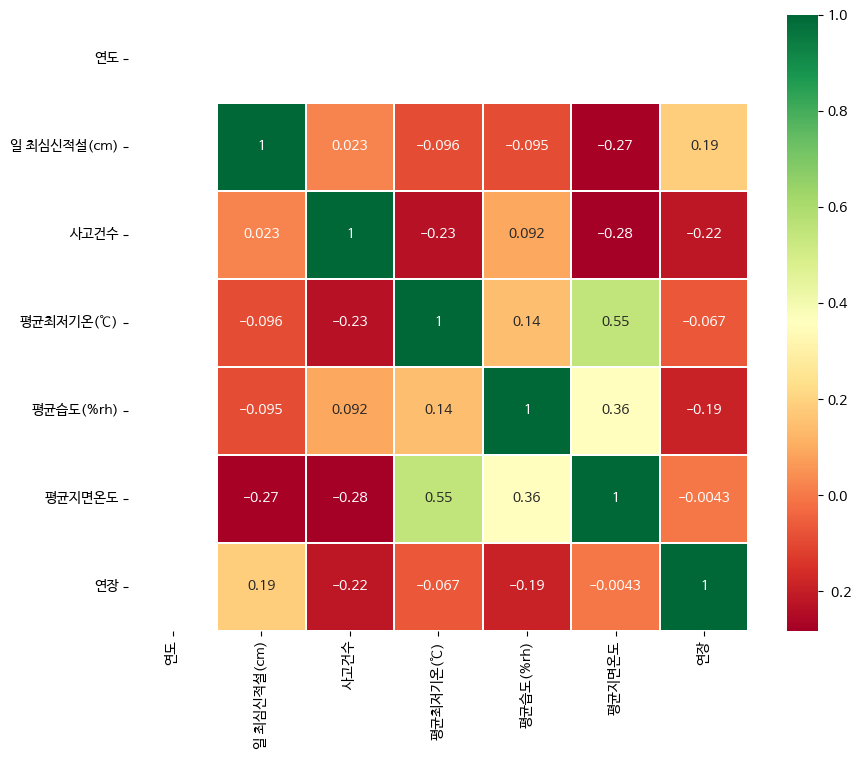

In [82]:
sns.heatmap(fin_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

사고건수와 연장의 음의 상관관계?
칼럼 많으면(내용적으로 중복 되면) 다중공선성 문제 있을 수도

In [83]:
'''


X_train, X_test, y_train, y_test = train_test_split(X,

                                                    y,

                                                    test_size=0.3,

                                                    shuffle=False,

                                                    random_state=1004)''' #결과 달라지는 현상 방지 위해 set seed

'\n\n\nX_train, X_test, y_train, y_test = train_test_split(X,\n\n                                                    y,\n\n                                                    test_size=0.3,\n\n                                                    shuffle=False,\n\n                                                    random_state=1004)'

# 강원(강설지역)

In [91]:
dat.head()

,사고발생일자,사고발생년도,사고발생월도,지역(시도),지역(구군),공휴일구분,주말구분,요일,주차,사고건수
0,20170101,2017,1,전남,무안군,Y,Y,7,1,22
1,20170101,2017,1,전남,장성군,Y,Y,7,1,3
2,20170101,2017,1,인천,중구,Y,Y,7,1,19
3,20170101,2017,1,경북,경주시,Y,Y,7,1,35
4,20170101,2017,1,경남,통영시,Y,Y,7,1,14


<Axes: xlabel='사고발생월도', ylabel='사고건수'>

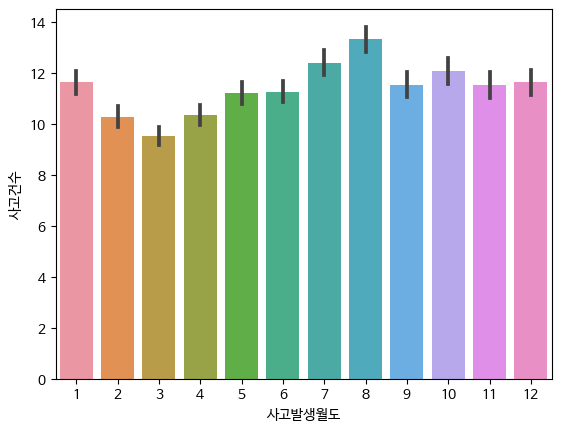

In [96]:
gangwon=dat.loc[dat['지역(시도)']=='강원']
sns.barplot(x='사고발생월도',y='사고건수',data=gangwon)

하긴 휴가철이라 사람 제일 많을 때니까...

<Axes: xlabel='사고발생월도', ylabel='사고건수'>

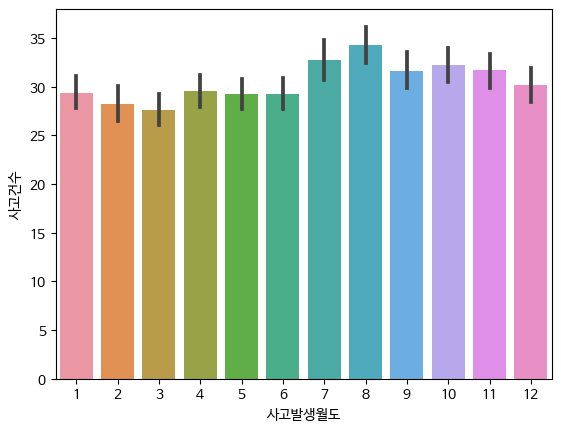

In [99]:
jeju=dat.loc[dat['지역(시도)']=='제주']
sns.barplot(x='사고발생월도',y='사고건수',data=jeju)

<Axes: xlabel='사고발생월도', ylabel='사고건수'>

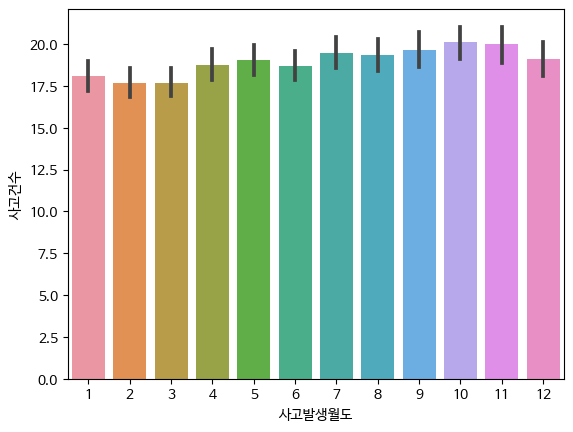

In [100]:
gyeongnam=dat.loc[dat['지역(시도)']=='경남']
sns.barplot(x='사고발생월도',y='사고건수',data=gyeongnam)

<Axes: xlabel='사고발생월도', ylabel='사고건수'>

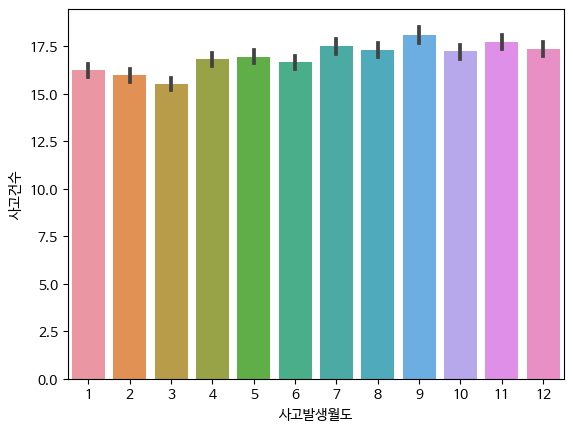

In [101]:
busan=dat.loc[dat['지역(시도)']=='부산']
sns.barplot(x='사고발생월도',y='사고건수',data=busan)

<Axes: xlabel='사고발생월도', ylabel='사고건수'>

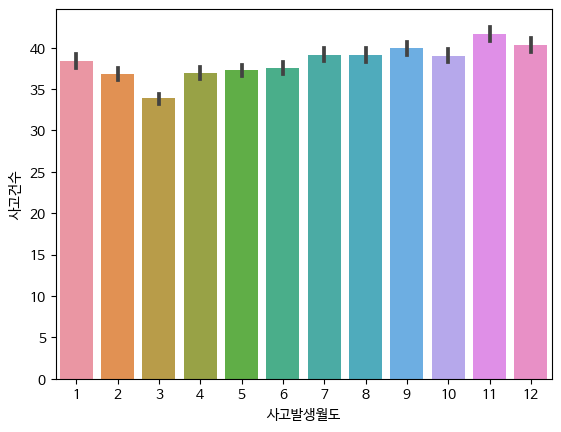

In [97]:
seoul=dat.loc[dat['지역(시도)']=='서울']
sns.barplot(x='사고발생월도',y='사고건수',data=seoul)

<Axes: xlabel='사고발생월도', ylabel='사고건수'>

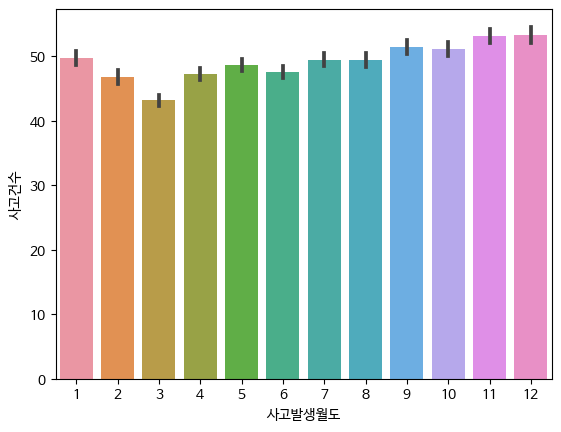

In [98]:
gyeonggi=dat.loc[dat['지역(시도)']=='경기']
sns.barplot(x='사고발생월도',y='사고건수',data=gyeonggi)

휴가지가 많은 지역(강원: 속초/양양 등, 제주: 서귀포, 제주 등)일수록 여름 휴가철에 사고 다발
도심지(서울, 부산 등)는 사고건수 자체도 강원, 제주에 비해 많고
도심지끼리 비슷한 양상(사고발생월도의 분포 유사)